In [ ]:
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [ ]:
fish_input = fish.iloc[:,1:].to_numpy()
fish_target = fish.iloc[:,0].to_numpy()

In [ ]:
fish_input[:3],fish_target[:3]

(array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
        [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
        [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961]]),
 array(['Bream', 'Bream', 'Bream'], dtype=object))

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 특성 스케일링
ss = StandardScaler()
fish_input_ss = ss.fit_transform(fish_input)
X_train,X_test,y_train,y_test = train_test_split(fish_input_ss, fish_target, random_state=25)

# 모델 선정
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(X_train, y_train)
# 클래스를 보여줌
print(kn.classes_)
# 예측
print(kn.predict(X_test[:5]))

print(kn.predict_proba(X_test[:5]))     # predict_proba 메서드로 클래스 별 확률값을 반환

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
['Pike' 'Bream' 'Perch' 'Roach' 'Perch']
[[0.         0.         0.         1.         0.         0.
  0.        ]
 [1.         0.         0.         0.         0.         0.
  0.        ]
 [0.         0.         0.66666667 0.         0.33333333 0.
  0.        ]
 [0.         0.         0.33333333 0.         0.66666667 0.
  0.        ]
 [0.         0.         1.         0.         0.         0.
  0.        ]]


# 로지스틱 회귀
$\sigma(z) = \frac{1}{1 + e^{-z}}$

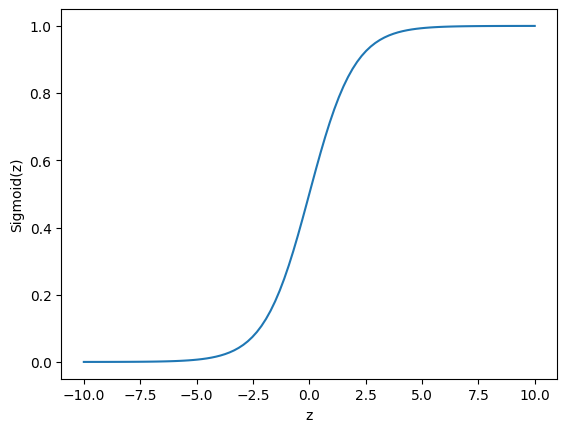

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 로직스틱 함수(시그모이드 함수)
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
sigmoid_value = sigmoid(z)

plt.plot(z, sigmoid_value)
plt.xlabel('z')
plt.ylabel('Sigmoid(z)')
plt.show()

In [ ]:
fish['Species'].value_counts()

Species
Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: count, dtype: int64

In [ ]:
perch_bream_df = fish[fish['Species'].isin(['Perch', 'Bream'])]
perch_bream_df.head(2)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.52,4.0200
1,Bream,290.0,26.3,31.2,12.48,4.3056


In [ ]:
new_fish = fish[(fish['Species'] == 'Perch') | (fish['Species'] == 'Bream')]
new_fish.describe(include='object')

,Species
count,91
unique,2
top,Perch
freq,56


In [ ]:
from sklearn.linear_model import LogisticRegression
X = new_fish.iloc[:,1:]
y = new_fish.iloc[:,0]

In [ ]:
lr = LogisticRegression()
# 학습
lr.fit(X,y)
# 평가

# predict_proba 학습한 5개의 데이터
lr.predict_proba(X[:5]), y[:5], lr.classes_

(array([[0.96911206, 0.03088794],
        [0.98932598, 0.01067402],
        [0.97258708, 0.02741292],
        [0.97957509, 0.02042491],
        [0.94425412, 0.05574588]]),
 0    Bream
 1    Bream
 2    Bream
 3    Bream
 4    Bream
 Name: Species, dtype: object,
 array(['Bream', 'Perch'], dtype=object))

In [ ]:
lr.decision_function(X[:5])

array([-3.44601449, -4.52921155, -3.56894514, -3.87036373, -2.82959179])

# 다중 분류

$\text{softmax}(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$

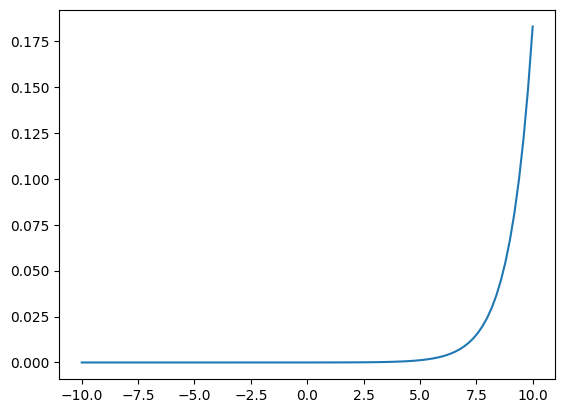

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 소프트 맥스 함수
def softmax(z):
    exp_z = np.exp(z)
    return exp_z / np.sum(exp_z)

z = np.linspace(-10, 10, 100)
softmax_value = softmax(z)

plt.plot(z, softmax_value)
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

fish_input_ss = StandardScaler().fit_transform(fish_input)

lr = LogisticRegression(penalty='l2',C=3,max_iter=1000)   # 규제 강도
lr.fit(fish_input_ss,fish_target)
lr.score(fish_input_ss,fish_target) ,lr.score(X_test,y_test)

(0.9622641509433962, 0.975)

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X = fish.iloc[:,1:]
y = fish.iloc[:,0]
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y, random_state=25)
ss.fit(X_train)
X_train_ss = ss.transform(X_train);  X_test_ss = ss.transform(X_test)

lr = LogisticRegression(penalty='l2',C=20,  max_iter=1000)  # 규제강도..
lr.fit(fish_input_ss,fish_target)
lr.score(X_train_ss,y_train), lr.score(X_test_ss,y_test)

(0.9243697478991597, 0.925)

In [ ]:
# 적절한 규제 강도 찾기
# LogisticRegression
# 못 찾을 경우 모델 체인지
C_list = list(range(1,51))
train_score_list, test_score_list = [],[]
best_model = None; diff_score = 100; find_c = None
for c in C_list:
  lr = LogisticRegression(penalty='l2',C=c,  max_iter=20000)  # 규제강도..
  lr.fit(X_train_ss,y_train)
  train_score_list.append(lr.score(X_train_ss,y_train)),  test_score_list.append( lr.score(X_test_ss,y_test) )
  gap = lr.score(X_train_ss,y_train) - lr.score(X_test_ss,y_test)
  if gap >=0 and diff_score > gap:
    diff_score = gap
    best_model = lr
    find_c = c

In [ ]:
print(find_c)
best_model.score(X_train_ss,y_train), best_model.score(X_test_ss,y_test)

25


(0.9327731092436975, 0.925)

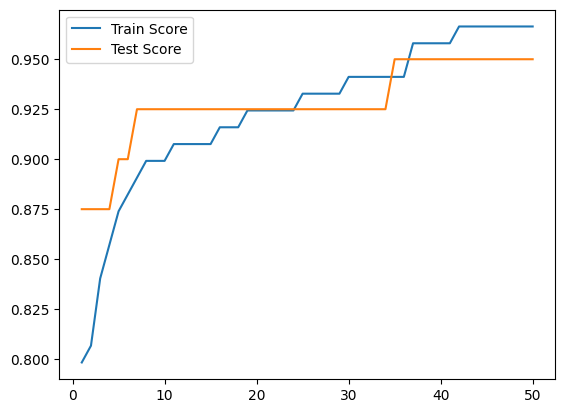

In [ ]:
plt.plot(C_list, train_score_list, label='Train Score')
plt.plot(C_list, test_score_list, label='Test Score')
plt.legend()
plt.show()

In [ ]:
#########################gpt#########################
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# 데이터 스케일링
scaler = StandardScaler()
fish_input_ss = scaler.fit_transform(fish_input)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(fish_input_ss, fish_target, test_size=0.2, random_state=42)

# Logistic Regression 모델 학습
lr = LogisticRegression(penalty='l2', C=3, max_iter=1000)  # 규제 강도 설정
lr.fit(X_train, y_train)

# 결과 출력
train_score = lr.score(X_train, y_train)
test_score = lr.score(X_test, y_test)

print("Train Score:", train_score)
print("Test Score:", test_score)

# 적절한 규제 강도 찾기
# 규제 강도(C)를 조정하여 최적의 모델을 찾는다
best_score = 0
best_C = 0
for C in [0.001, 0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(penalty='l2', C=C, max_iter=1000)
    lr.fit(X_train, y_train)
    score = lr.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_C = C

print("Best Score:", best_score)
print("Best C:", best_C)

# 만약 적절한 규제 강도를 찾지 못했을 경우 모델을 변경한다
if best_score < 0.8:
    # 모델 변경 코드 작성
    print("Model change required.")


Train Score: 0.84251968503937
Test Score: 0.875
Best Score: 0.90625
Best C: 10


모델
- 분류
  - K 최근접 이웃 찾기, 로지스틱 회귀(1,2 규제, 학습횟수) - 로지스틱 함수(시그모이드)(이진분류), 소프트 맥스 함수(다중분류)
- 예측
  - 선형회귀(비선형-->차수를 높여-->polynoynial
  - 리지(L2), 라쏘(L1)
규제의 경우 반드시 스케일링을 하고 적

In [ ]:
df = pd. read_csv('https://raw.githubusercontent.com/bigdataleeky/python/main/factory_train.csv')
df.head(2)
# Y_class정답

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN


In [ ]:
# PRODUCT_ID : 제품의 고유 ID
# Y_Class : 제품 품질 상태(Target) <<<< 결과로 확인하고자 하는
# 0 : 적정 기준 미달 (부적합)
# 1 : 적합
# 2 : 적정 기준 초과 (부적합)
# Y_Quality : 제품 품질 관련 정량적 수치
# TIMESTAMP : 제품이 공정에 들어간 시각
# LINE : 제품이 들어간 공정 LINE 종류 ('T050304', 'T050307', 'T100304', 'T100306', 'T010306', 'T010305' 존재)
# PRODUCT_CODE : 제품의 CODE 번호 ('A_31', 'T_31', 'O_31' 존재)
# X_1 ~ X_2875 : 공정 과정에서 추출되어 비식별화된 변수

In [ ]:
# 필요한 컬럼 추출
# PRODUCT_ID 제거
df_copy = df.iloc[:,2:]

In [ ]:
df_copy.head(2)

,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 수치형 데이터만 추출
temp = df_copy.describe()
temp.columns

Index(['Y_Quality', 'X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8',
       'X_9',
       ...
       'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
       'X_2873', 'X_2874', 'X_2875'],
      dtype='object', length=2876)

In [ ]:
train_df = df_copy.loc[:,temp.columns]
train_df.head(2)

,Y_Quality,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,0.533433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,0.541819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 결측치 제거 과정
print(train_df.shape)
print(train_df.isnull().sum())
# 결측치가 너무 많을 경우 함부로 날리는 것은 위험하다
# 결측치를 평균이나 앞뒤 관계로 채우는 경우 경우등등이 있고 이 경우에는 0으로 채운다

(598, 2876)
Y_Quality      0
X_1          249
X_2          249
X_3          249
X_4          249
            ... 
X_2871       499
X_2872       598
X_2873       598
X_2874       598
X_2875       598
Length: 2876, dtype: int64


In [ ]:
train_df = train_df.fillna(0)

In [ ]:
# 분류모델에서는
# 종속변수-정답-타깃-클래스
y = df['Y_Class']

In [ ]:
# 0 : 적정 기준 미달(부적합)
# 1 : 적합
# 2 : 적정 기준 초과 (부적합) ==> 0

In [ ]:
y = y.apply(lambda x:0 if x == 2 else x).to_numpy()

In [ ]:
X = train_df.to_numpy()

In [ ]:
# 이진분류 모델....k-최근접 이웃, 로지스틱 회귀(2진 분류...)

In [ ]:
# 1. 모델 선정(로지스틱)
# 2. 데이터 분리
# 3. 표준화(스케일링)
# 4. 학습
# 5. 평가 -- 과적합 유무 확인 4번부터 다시 ... 이때 파라미터를 조정해본다.
# 6. 그러면 다시 데이터를 다시 확인 / 다른 모델을 선택

In [ ]:
from sklearn.preprocessing import StandardScaler
lr = LogisticRegression(C=20, max_iter=1000)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=25)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train) ,lr.score(X_test_scaled,y_test)

(1.0, 0.6266666666666667)

In [ ]:
from tqdm import tqdm
C_list = range(1,50)
train_score_list, test_score_list = [],[]
for c in tqdm(C_list):
  lr = LogisticRegression(C=c,max_iter=5000)
  lr.fit(X_train_scaled,y_train)
  train_score_list.append(lr.score(X_train_scaled,y_train)), test_score_list.append(lr.score(X_test_scaled,y_test))

100%|██████████| 49/49 [02:04<00:00,  2.53s/it]


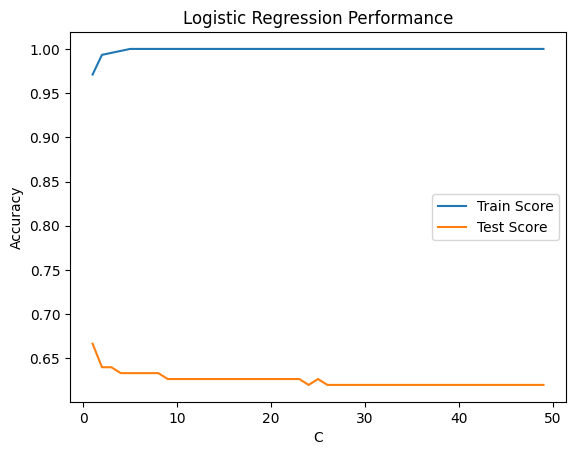

In [ ]:
# 시각화
plt.plot(C_list, train_score_list, label='Train Score')
plt.plot(C_list, test_score_list, label='Test Score')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Performance')
plt.legend()
plt.show()        # 잘못된 결과

K-최근접 이웃

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(X_train_scaled, y_train)
kn.score(X_train_scaled, y_train), kn.score(X_test_scaled, y_test)

(0.8147321428571429, 0.7333333333333333)

In [ ]:
df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
list([df.columns[2]])+list([df.columns[6:]])

['Y_Quality',
 Index(['X_1', 'X_2', 'X_3', 'X_4', 'X_5', 'X_6', 'X_7', 'X_8', 'X_9', 'X_10',
        ...
        'X_2866', 'X_2867', 'X_2868', 'X_2869', 'X_2870', 'X_2871', 'X_2872',
        'X_2873', 'X_2874', 'X_2875'],
       dtype='object', length=2875)]

In [ ]:
category_cols = ['LINE',  'PRODUCT_CODE']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df = df.fillna(0)
line_label = le.fit_transform(df['LINE'])
product_code_label = le.fit_transform(df['PRODUCT_CODE'])
line_onehot = pd.get_dummies(line_label,prefix="LINE")
product_onehot = pd.get_dummies(product_code_label,prefix="PRODUCT_CODE")
train_df = df.loc[:,list([df.columns[2]]) + list(df.columns[6:])]
train_df = pd.concat( (train_df,line_onehot,product_onehot), axis=1  )
X = train_df.to_numpy()
y = df['Y_Class']
y = y.apply(lambda x : 0 if x == 2 else x).to_numpy()
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=25)
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(X_train_scaled,y_train)
lr.score(X_train_scaled,y_train) ,lr.score(X_test_scaled,y_test)

## 이 모델은 적합하지 않음

(1.0, 0.6266666666666667)

In [ ]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train) ,lr.score(X_test_scaled,y_test)

(0.8147321428571429, 0.6266666666666667)

SGD: 확률적 경사하강법 - 손실 함수 값이 최소가 되는 방향으로 학습을 연속적으로 해서 결국 최소값에 도달하는 기법
- 경량화된 모델

In [ ]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(max_iter=50000,early_stopping=True)     # 조기종료-개선의 여부가 보이지 않으면 남아있는 학습 횟수가 있어도 중지
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test)

(0.4419642857142857, 0.4266666666666667)

In [ ]:
model.partial_fit(X_train_scaled, y_train)
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test)

(0.7544642857142857, 0.7133333333333334)

epoch
 - 데이터셋을 소모할 때까지 학습한 결과를  : 1epoch
 - partial_fit:데이터를 여러번 나누어서 학습, 반복 호출될 수 있음


In [ ]:
model = SGDClassifier(loss='log_loss',random_state=25)
history = {
    'train' : [], 'test' : []
}
for i in tqdm(range(500)):
  model.partial_fit(X_train_scaled, y_train,classes = np.unique(y_train))
  history['train'].append(model.score(X_train_scaled, y_train))
  history['test'].append(model.score(X_test_scaled, y_test))

100%|██████████| 500/500 [00:11<00:00, 44.35it/s]


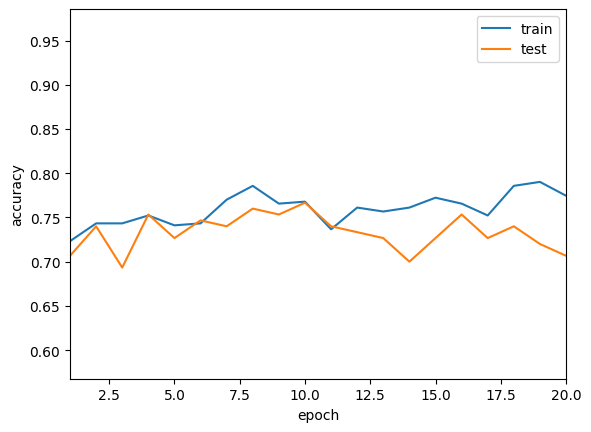

In [ ]:
plt.plot(range(500),history['train'],label='train')
plt.plot(range(500),history['test'], label='test')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.xlim((1,20))
plt.legend()
plt.show()

In [ ]:
model = SGDClassifier(loss='log_loss',random_state=25,max_iter=10,tol=None)  # 손실함수의 값이 tol보다 작으면 최적화를 종료
model.fit(X_train_scaled,y_train)
model.score(X_train_scaled,y_train), model.score(X_test_scaled,y_test)

(0.7723214285714286, 0.66)

결정트리

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train_scaled, y_train)
model.score(X_train_scaled, y_train), model.score(X_test_scaled, y_test)

(1.0, 0.9933333333333333)